# Recycling - where to? 

Introductory text

Information about how to recycle in [Madrid](https://www.comunidad.madrid/servicios/consumo/reciclaje-donde-tirar-cada-producto)


# Image classification

## Importing and visualising data
- Info on `os.walk` in [GeeksForGeeks](https://www.geeksforgeeks.org/os-walk-python/)
- For library `cv2`: [Opencv-python](https://pypi.org/project/opencv-python/)

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

# check file paths based on a given folder, in this case "Data/clean"
#for dirname, _, _ in os.walk('../Data/clean'):
 #   print(dirname)

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [5]:
train_path = "../Data/clean/output/train/"
test_path = "../Data/clean/output/test/"

In [6]:
root_dir = '../Data/clean'
classes = ['glass', 'organic', 'paper', 'recycling_point', 'yellow']

In [7]:
class_names_label = {classes:i for i, classes in enumerate(classes)}
class_names_label
nb_classes = len(classes)

In [8]:
def load_data(image_size = (150,150)):
    '''
    Load the data:
        - 9861 images to train the network.
        - 2466 images to evaluate how accurately the network learned to classify images.

    Output: tuples for train and test set (image, labels)
    '''
    
    datasets = [train_path, test_path]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../Data/clean/output/train/


100%|██████████| 2157/2157 [00:13<00:00, 154.45it/s]


Loading ../Data/clean/output/test/


100%|██████████| 540/540 [00:02<00:00, 194.16it/s]


In [61]:
# scaling data
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [64]:
train_images.shape

(9861, 150, 150, 3)

In [62]:
train_images[1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [83]:
# check number of images in each category/class
from collections import Counter
display(class_names_label)
counter = Counter(train_labels)
#updated_counter = Counter({class_names_label[key]: value for key, value in counter.items() if key in class_names_label})
#updated_counter
counter

{'glass': 0, 'organic': 1, 'paper': 2, 'recycling_point': 3, 'yellow': 4}

Counter({3: 2240, 4: 2157, 0: 2004, 1: 2000, 2: 1460})

### Plot data

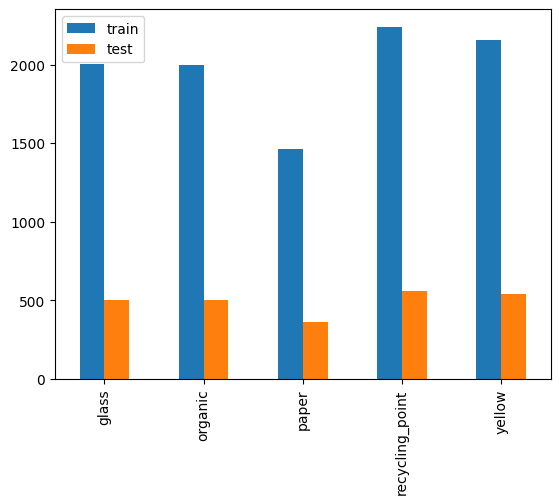

In [39]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
data = pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=classes
            )
data.plot.bar()
plt.show()

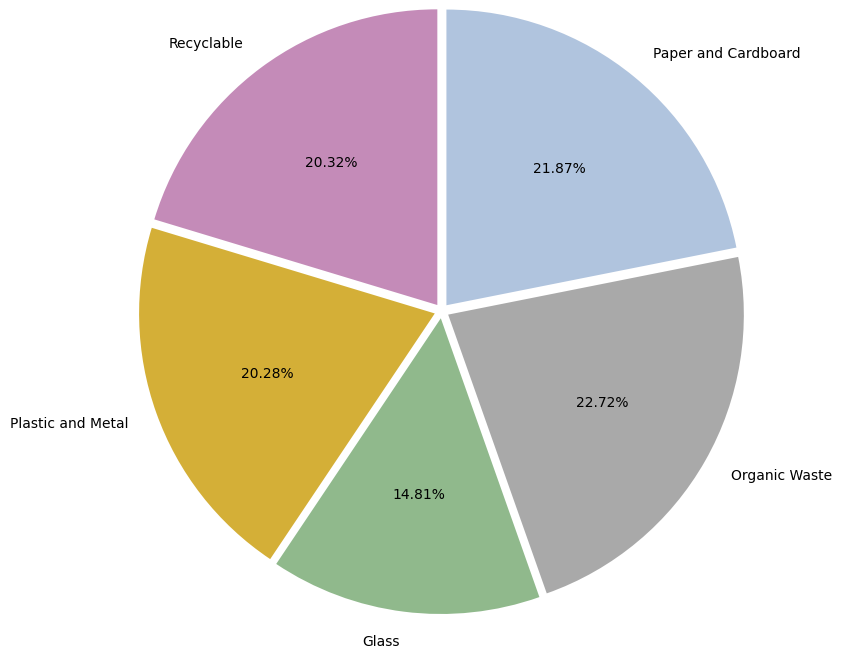

In [40]:
# plot the different categories
colors = ['#c48bb8','#D4AF37', '#90B98C', '#A9A9A9', '#B0C4DE']
plt.pie(train_counts,startangle=90,explode=[0.05,0.05, 0.05,0.05, 0.05],autopct='%0.2f%%',
        labels=['Recyclable', 'Plastic and Metal', 'Glass', 'Organic Waste', 'Paper and Cardboard'], colors= colors,radius=2)
plt.show()

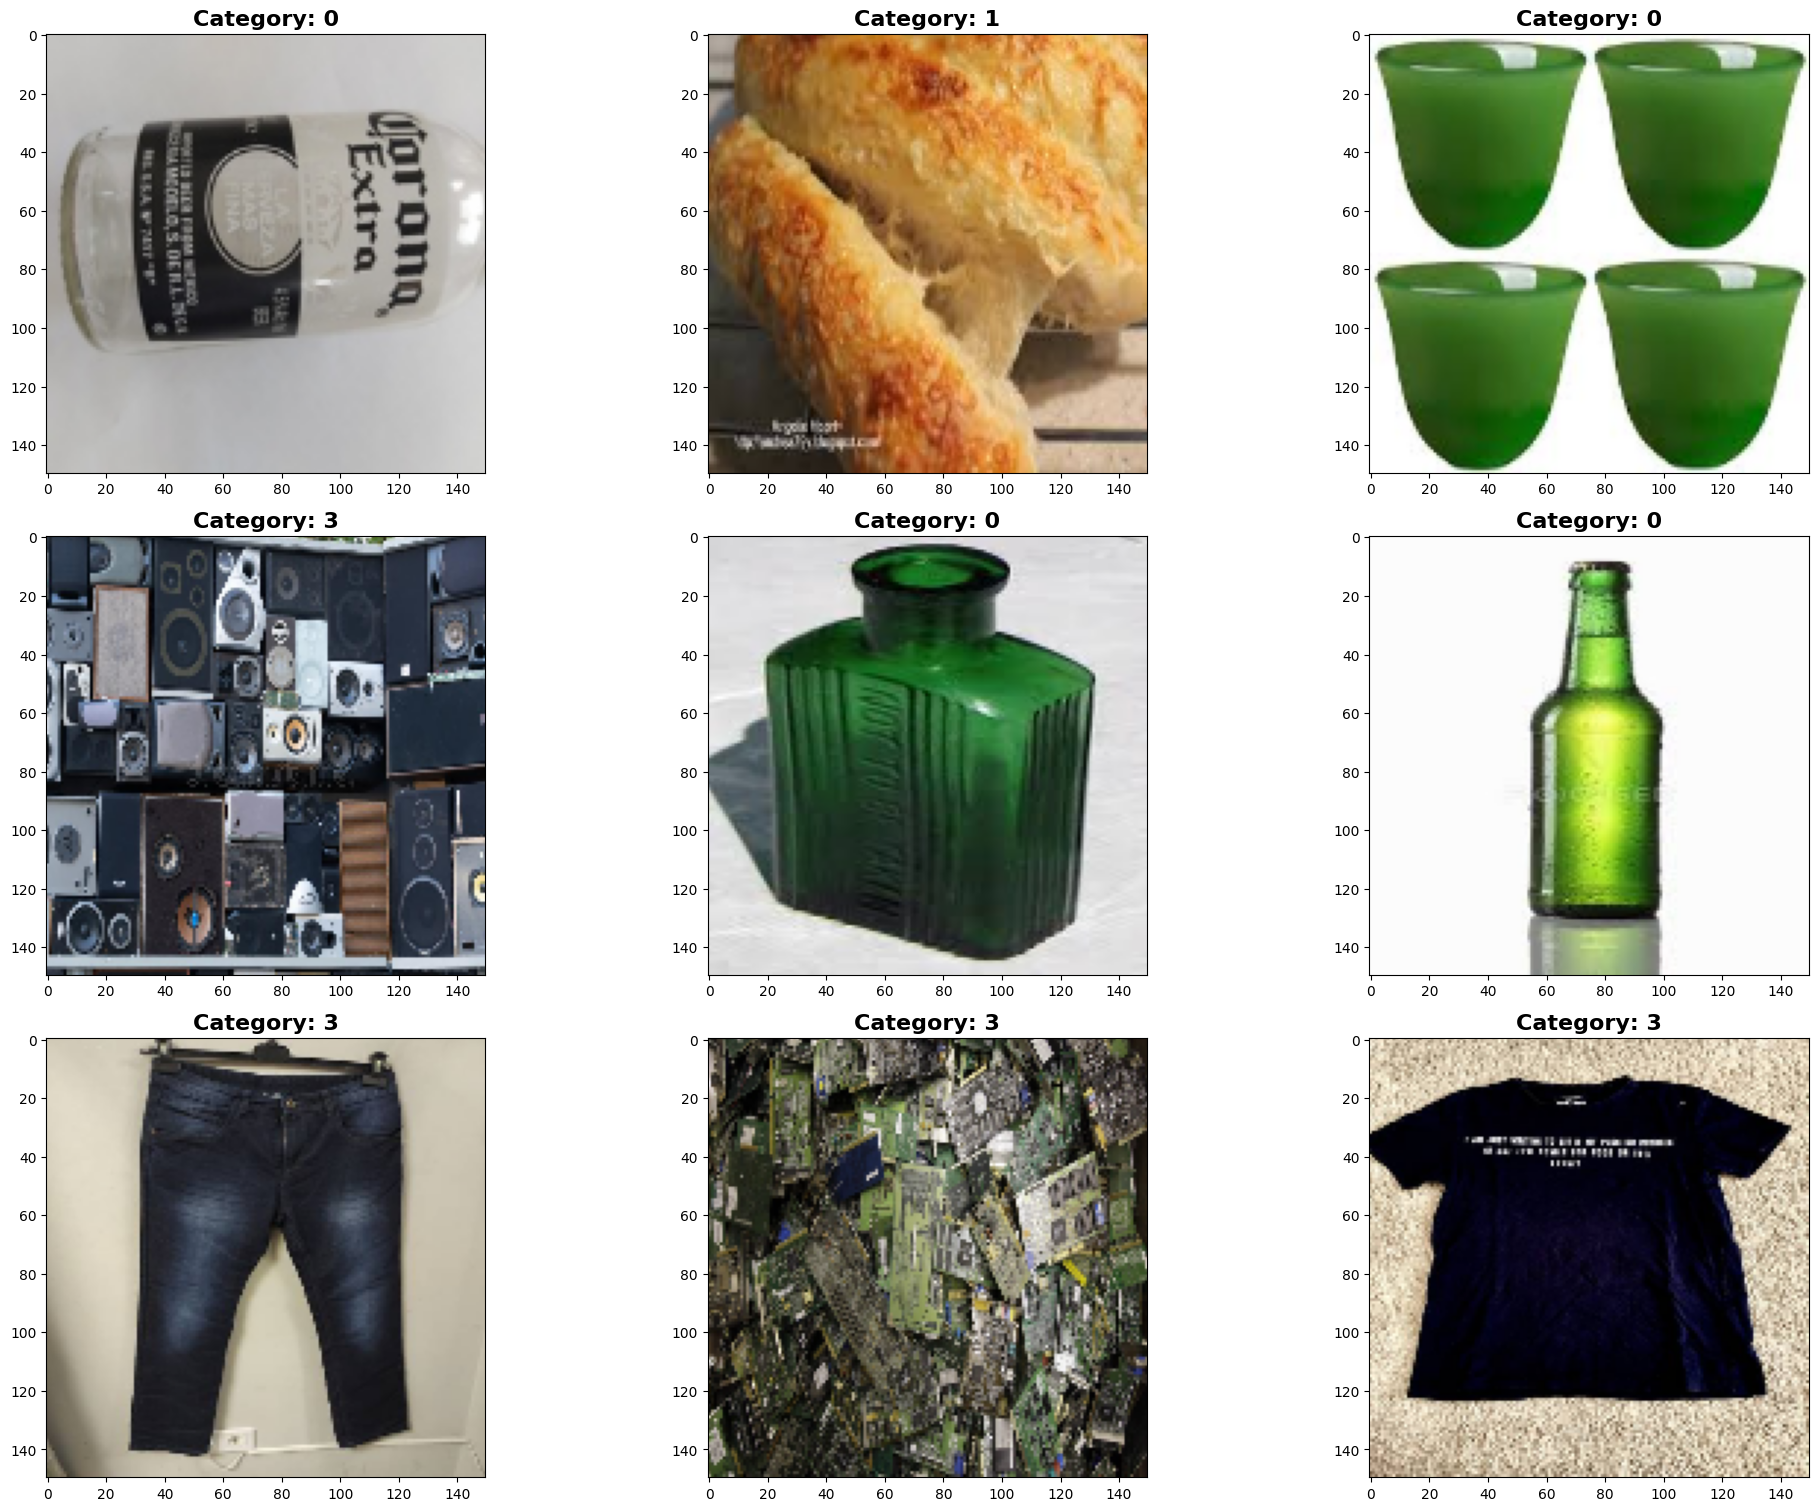

In [63]:
# the following plot gives us an idea of the type of images in the training set
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(9861)
    plt.title('Category: {0}'.format(train_labels[index]),fontdict={'size':16,'weight':'bold'})
    plt.imshow((train_images[index]*255).astype(np.uint8))
    plt.tight_layout()

## Model building
### Information about functions and classes
- **ImageDataGenerator** 
    - [Explanation here](https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)
    - It accepts the original data, randomly transforms it, and returns only the new, transformed data.


- **Layers**
    - Convolutional
    - Activation
    - Pooling

    - Flatten: transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
    - Dense
    - Activation (_'relu'_ - given a value x, returns max(x, 0) - and last layer _'softmax'_ - 6 neurons, probability that the image belongs to one of the classes-)

## Model 1

In [87]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape = (150,150,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), activation = 'relu'))  
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu') )
    model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'softmax')) # output

    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 256

In [88]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

Information about `ModelCheckpoint` and `EarlyStopping` -> [click here](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model (create checkpoints: it's a temp file that stores the neural network - just in case there's a problem so you don't have to start form scratch)

checkpoint_path = 'class-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [92]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5)

#es = EarlyStopping(monitor='val_accuracy', patience=5)

In [43]:
hist = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=2,
        callbacks=[early_stopping,checkpoint]
        )


Epoch 1/10

Epoch 1: saving model to class-nn1.hdf5
62/62 - 329s - loss: 13.8332 - accuracy: 0.4159 - val_loss: 2.3378 - val_accuracy: 0.0000e+00 - 329s/epoch - 5s/step
Epoch 2/10

Epoch 2: saving model to class-nn1.hdf5
62/62 - 517s - loss: 1.2144 - accuracy: 0.5264 - val_loss: 3.0477 - val_accuracy: 0.0000e+00 - 517s/epoch - 8s/step
Epoch 3/10

Epoch 3: saving model to class-nn1.hdf5
62/62 - 479s - loss: 1.1340 - accuracy: 0.5521 - val_loss: 3.1307 - val_accuracy: 0.0000e+00 - 479s/epoch - 8s/step
Epoch 4/10

Epoch 4: saving model to class-nn1.hdf5
62/62 - 394s - loss: 1.0542 - accuracy: 0.5809 - val_loss: 3.4863 - val_accuracy: 0.0000e+00 - 394s/epoch - 6s/step
Epoch 5/10

Epoch 5: saving model to class-nn1.hdf5
62/62 - 346s - loss: 0.9911 - accuracy: 0.6118 - val_loss: 3.5451 - val_accuracy: 0.0000e+00 - 346s/epoch - 6s/step
Epoch 6/10

Epoch 6: saving model to class-nn1.hdf5
62/62 - 330s - loss: 0.9474 - accuracy: 0.6422 - val_loss: 3.9599 - val_accuracy: 0.0000e+00 - 330s/epoch -

In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

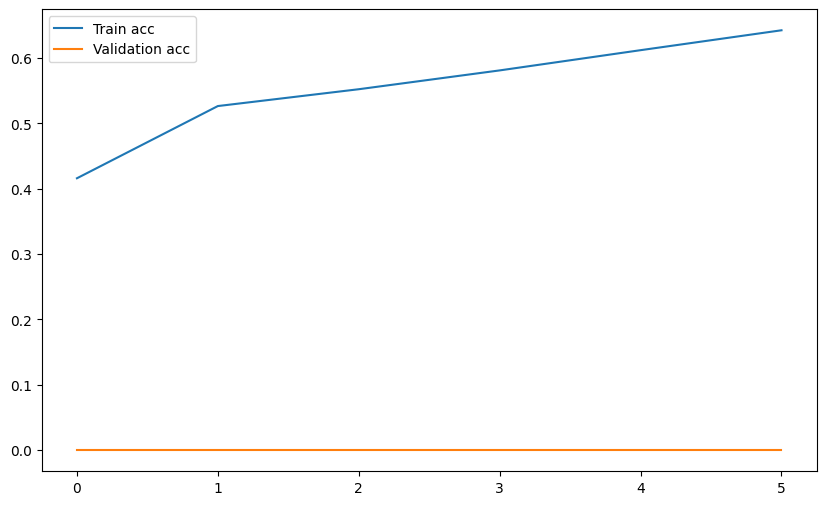

In [44]:
# plot accuracy

plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.title
plt.legend()
plt.show()

In [10]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "Train acc")
    plt.plot(history.history['val_accuracy'], label = "Validation acc")
    plt.title("Accuracy: train vs validation")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], label = "Train loss")
    plt.plot(history.history['val_loss'], label = "Validation loss")
    plt.title("Loss: train vs validation")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [51]:
plot_accuracy_loss(hist)

NameError: name 'hist' is not defined

In [53]:
test_loss = model.evaluate(test_images, test_labels)

78/78 [==============================] - 38s 481ms/step - loss: 1.6320 - accuracy: 0.4793


Loading the checkpoint

In [17]:
model.load_weights(checkpoint_path)
loss, accuracy_d = model.evaluate(test_images, test_labels, verbose=2)

78/78 - 18s - loss: 1.6320 - accuracy: 0.4793 - 18s/epoch - 236ms/step


In [21]:
def display_random_image(class_names, images, labels):
    '''
    Display a random image from the images array and its correspond label from the labels array.
    Input: class_names, images, labels
    Output: labelled random image
    
    '''
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow((images[index]*255).astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [20]:
test_images.shape

(2466, 150, 150, 3)

### Predictions Model 1

In [41]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

78/78 [==============================] - 18s 233ms/step


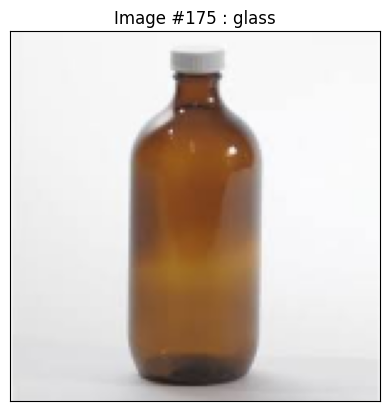

In [69]:
display_random_image(classes, test_images, pred_labels)

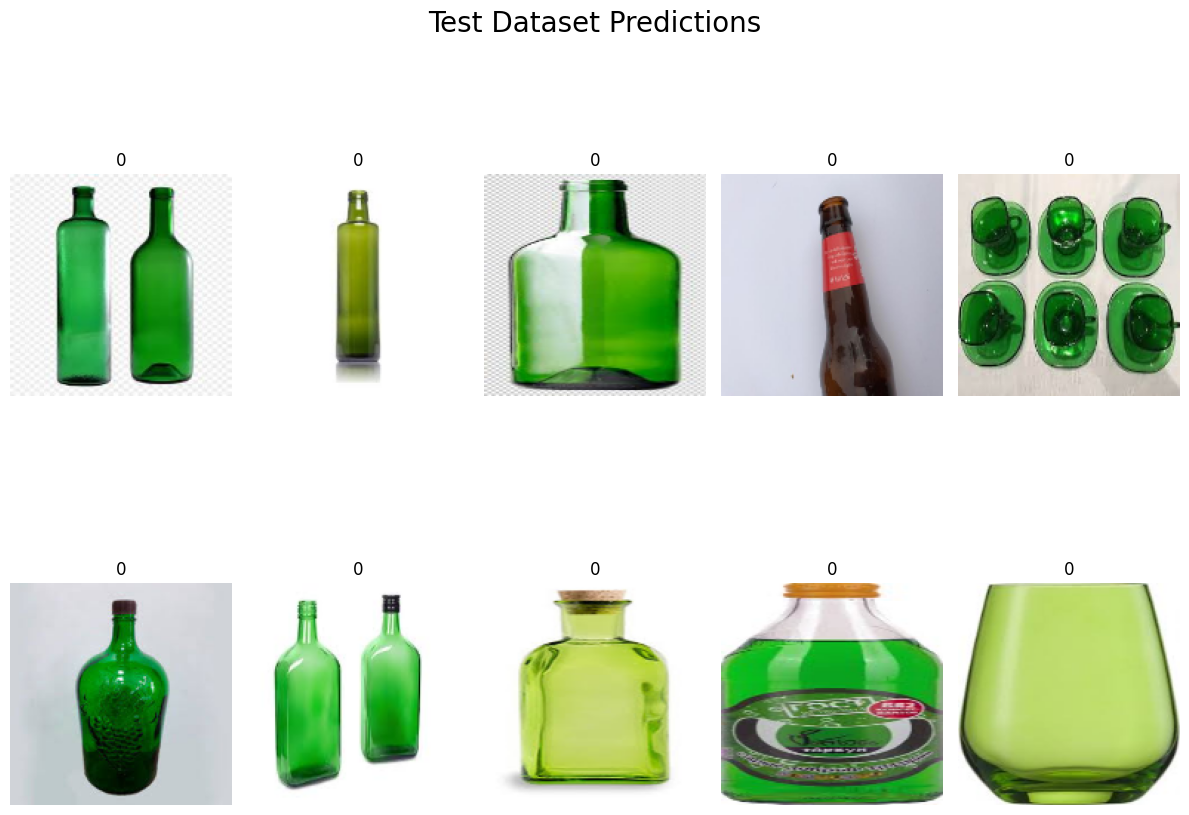

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 6

for i in range(2):
    for j in range(5):
        predicted_label = test_labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow((test_images[idx]*255).astype(np.uint8))
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

## Model 2
- Changed
    - Number of convolutional and poooling layers
    - Number of neurons in Conv2D second layer
    - Number of hidden layers in NN and its neurons
    - Images are scaled

In [94]:
def create_model2():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape = (150,150,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32,(3,3), activation = 'relu'))  
    model.add(MaxPooling2D(pool_size=(2,2)))

    #model.add(Conv2D(128,(3,3), activation = 'relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(64, activation = 'relu') )
    #model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'softmax')) # output
    
    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 128

In [95]:
model2 = create_model2()
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

### Checkpoint and early stopping
Following the ideas in [Machine Learning Mastery website](https://machinelearningmastery.com/check-point-deep-learning-models-keras/) I have applied the following changes:
1. Save only the best


Keras weights initializer - check best for image classification
Model from keras -  quitar capas inferiores, congelar capas

In [96]:
checkpoint_path = 'class-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor = 'val_accuracy',
    save_freq='epoch',
    save_weights_only=False,
    verbose=1,
    save_best_only = True,
    mode = 'max'
)


from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=5)
es = EarlyStopping(monitor='val_accuracy', patience=5)

In [97]:
hist = model2.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=2,
        callbacks=[early_stopping,checkpoint]
        )

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to class-nn2.hdf5
62/62 - 103s - loss: 1.3609 - accuracy: 0.5046 - val_loss: 3.4218 - val_accuracy: 0.0000e+00 - 103s/epoch - 2s/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.00000 to 0.00101, saving model to class-nn2.hdf5
62/62 - 106s - loss: 0.9722 - accuracy: 0.6263 - val_loss: 3.5444 - val_accuracy: 0.0010 - 106s/epoch - 2s/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.00101 to 0.01115, saving model to class-nn2.hdf5
62/62 - 113s - loss: 0.8595 - accuracy: 0.6725 - val_loss: 3.3690 - val_accuracy: 0.0112 - 113s/epoch - 2s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.01115
62/62 - 132s - loss: 0.7595 - accuracy: 0.7168 - val_loss: 4.1108 - val_accuracy: 0.0061 - 132s/epoch - 2s/step
Epoch 5/10

Epoch 5: val_accuracy improved from 0.01115 to 0.03142, saving model to class-nn2.hdf5
62/62 - 120s - loss: 0.6656 - accuracy: 0.7548 - val_loss: 3.6772 - val_accuracy: 0.0314 - 1

In [108]:
display(hist.history['loss'])
print('The loss of the best model is {}'.format(round(hist.history['loss'][-1], 3)))

[1.3608672618865967,
 0.9721933603286743,
 0.8595306873321533,
 0.759512186050415,
 0.6655948758125305,
 0.5958096385002136,
 0.5325929522514343,
 0.46795833110809326]

The loss of the best model is 0.468


### Plot

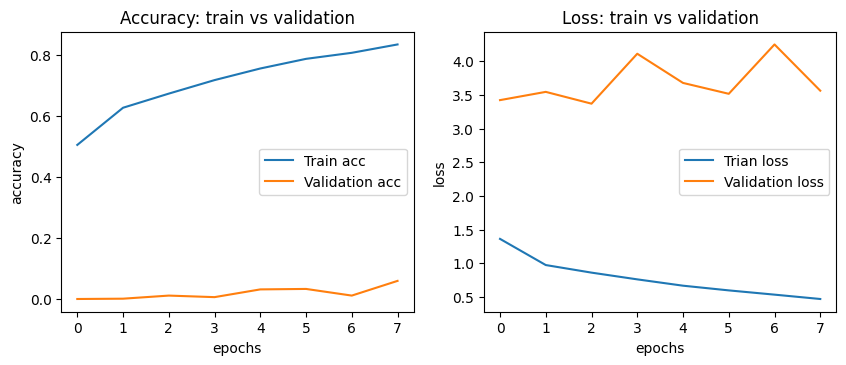

In [100]:
plot_accuracy_loss(hist)

### Predictions model 2

In [101]:
predictions2 = model2.predict(test_images)     # Vector of probabilities
pred_labels2 = np.argmax(predictions2, axis = 1) # We take the highest probability

78/78 [==============================] - 7s 87ms/step


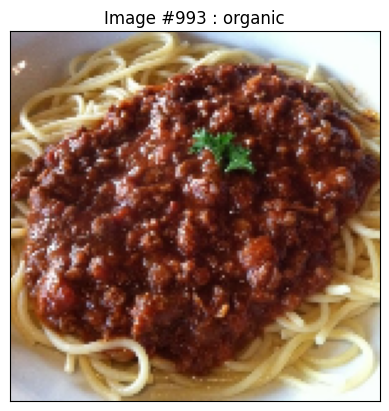

In [112]:
display_random_image(classes, test_images, pred_labels2)

## Model 3
- Difference between loss function in compile [sparse categorical crossentropy or CategoricalCrossentropy()](https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy)

In [114]:
def create_model3():
    model = Sequential()
    model.add(Conv2D(128,(3,3),input_shape = (150,150,3), activation = 'relu', kernel_initializer= "he_uniform"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), activation = 'relu'))  
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32,(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(64, activation = 'relu') )
    #model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'softmax')) # output
    
    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 128

model3 = create_model3()
print(model3.summary())

checkpoint_path = 'class-nn3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor = 'val_accuracy',
    save_freq='epoch',
    save_weights_only=False,
    verbose=1,
    save_best_only = True,
    mode = 'max'
)

es = EarlyStopping(monitor='val_accuracy', patience=5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 32)      

History

In [115]:
hist3 = model3.fit(
        train_images,
        train_labels,
        epochs=15,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=2,
        callbacks=[es,checkpoint]
        )

Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to class-nn3.hdf5
62/62 - 366s - loss: 1.2198 - accuracy: 0.4891 - val_loss: 2.9813 - val_accuracy: 0.0000e+00 - 366s/epoch - 6s/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.00000
62/62 - 364s - loss: 0.9374 - accuracy: 0.6401 - val_loss: 3.9385 - val_accuracy: 0.0000e+00 - 364s/epoch - 6s/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.00000
62/62 - 354s - loss: 0.8614 - accuracy: 0.6769 - val_loss: 3.4655 - val_accuracy: 0.0000e+00 - 354s/epoch - 6s/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.00000
62/62 - 353s - loss: 0.8030 - accuracy: 0.7022 - val_loss: 3.8823 - val_accuracy: 0.0000e+00 - 353s/epoch - 6s/step
Epoch 5/15

Epoch 5: val_accuracy improved from 0.00000 to 0.01622, saving model to class-nn3.hdf5
62/62 - 350s - loss: 0.7281 - accuracy: 0.7296 - val_loss: 2.6673 - val_accuracy: 0.0162 - 350s/epoch - 6s/step
Epoch 6/15

Epoch 6: val_accuracy did no

In [116]:
display(hist3.history['loss'])
print('The loss (sparse_categorical_crossentropy) of the best model is {}'.format(round(hist3.history['loss'][-1], 3)))

[1.2198339700698853,
 0.9374036192893982,
 0.861352801322937,
 0.8029500842094421,
 0.728146493434906,
 0.6755344271659851,
 0.6261840462684631,
 0.565514087677002,
 0.5077307224273682,
 0.45964911580085754,
 0.43249255418777466,
 0.3760073482990265,
 0.3130587339401245,
 0.28657495975494385,
 0.25250157713890076]

The loss (sparse_categorical_crossentropy) of the best model is 0.253


### Plot accuracy and loss

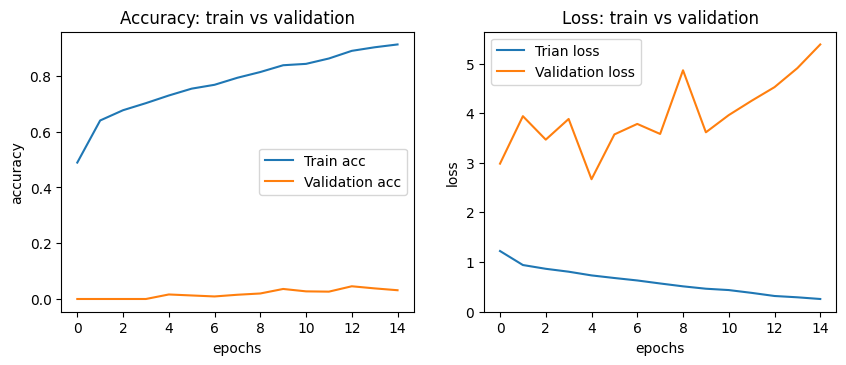

In [118]:
plot_accuracy_loss(hist3)

### Predictions model 3

In [119]:
predictions3 = model3.predict(test_images)     # Vector of probabilities
pred_labels3 = np.argmax(predictions3, axis = 1) # We take the highest probability

78/78 [==============================] - 24s 311ms/step


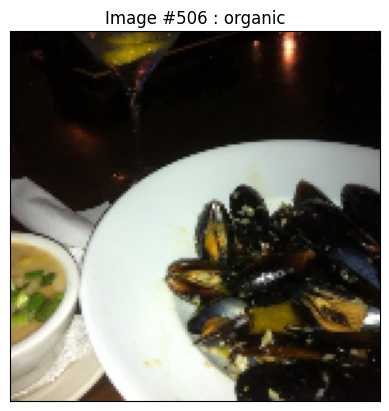

In [122]:
display_random_image(classes, test_images, pred_labels3)

## Model 4

**Changes**

Based on [this tutorial](https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)


- Kernel initializer: HeNormal
- Kerner regularizer: L2
- Added more layers
- Added layer BatchNormalization() [Info](https://keras.io/api/layers/normalization_layers/batch_normalization/) and [here](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)

In [125]:
from tensorflow.keras.initializers import HeUniform, HeNormal
initializer = HeNormal()

In [126]:
from tensorflow.keras.regularizers import l2
reg = l2(0.0005)

chanDim = -1

In [136]:
def create_model4():
    model = Sequential()
    model.add(Conv2D(32,(5,5),input_shape = (150,150,3), strides=(2,2),
                     activation = 'relu', kernel_initializer= initializer,
                     kernel_regularizer=reg))
    #model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), activation = 'relu', padding='same',
                     kernel_initializer=initializer, kernel_regularizer=reg))  
    #model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
			kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3), activation = 'relu', padding='same',
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3), activation = 'relu', padding='same', strides=(2,2),
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.25))

    # fully connected layer
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(Dense(64, activation = 'relu') )
    #model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(5, activation = 'softmax')) # output
    
    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 128

model4 = create_model4()
print(model4.summary())

checkpoint_path = 'class-nn4.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor = 'val_accuracy',
    save_freq='epoch',
    save_weights_only=False,
    verbose=1,
    save_best_only = True,
    mode = 'max'
)

es = EarlyStopping(monitor='val_accuracy', patience=5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 73, 73, 32)        2432      
                                                                 
 conv2d_22 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 73, 73, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_23 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 batch_normalization_5 (Batc  (None, 37, 37, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 37, 37, 64)       

History

In [128]:
hist4 = model4.fit(
        train_images,
        train_labels,
        epochs=15,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=2,
        callbacks=[es,checkpoint]
        )

Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.00456, saving model to class-nn4.hdf5
62/62 - 170s - loss: 1.7710 - accuracy: 0.5828 - val_loss: 5.0248 - val_accuracy: 0.0046 - 170s/epoch - 3s/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.00456
62/62 - 198s - loss: 1.2874 - accuracy: 0.6862 - val_loss: 4.5073 - val_accuracy: 0.0000e+00 - 198s/epoch - 3s/step
Epoch 3/15

Epoch 3: val_accuracy improved from 0.00456 to 0.04257, saving model to class-nn4.hdf5
62/62 - 188s - loss: 1.1293 - accuracy: 0.7411 - val_loss: 2.0503 - val_accuracy: 0.0426 - 188s/epoch - 3s/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.04257
62/62 - 172s - loss: 1.0186 - accuracy: 0.7760 - val_loss: 2.4970 - val_accuracy: 0.0314 - 172s/epoch - 3s/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.04257
62/62 - 170s - loss: 0.9127 - accuracy: 0.8048 - val_loss: 3.3471 - val_accuracy: 5.0684e-04 - 170s/epoch - 3s/step
Epoch 6/15

Epoch 6: val_accuracy did not improv

In [129]:
display(hist4.history['loss'])
print('The loss (sparse_categorical_crossentropy) of the best model is {}'.format(round(hist3.history['loss'][-1], 3)))

[1.771031141281128,
 1.2874027490615845,
 1.1292524337768555,
 1.01858651638031,
 0.9127389192581177,
 0.8184313178062439,
 0.7253856062889099,
 0.6588595509529114]

The loss (sparse_categorical_crossentropy) of the best model is 0.253


### Plot accuracy and loss

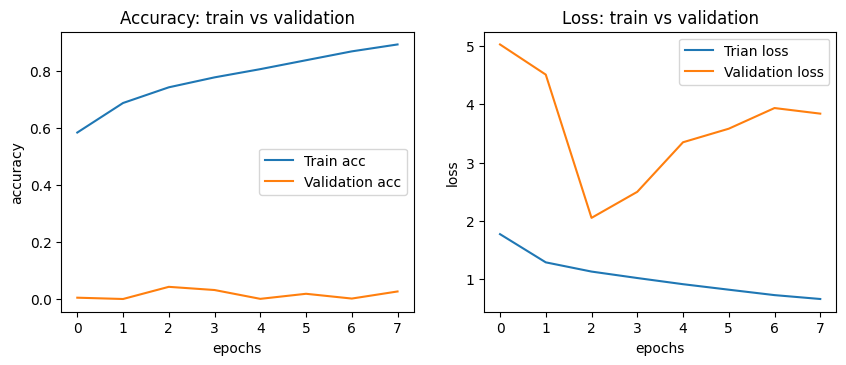

In [132]:
plot_accuracy_loss(hist4)

### Predictions model 4

In [131]:
predictions4 = model4.predict(test_images)     # Vector of probabilities
pred_labels4 = np.argmax(predictions4, axis = 1) # We take the highest probability

78/78 [==============================] - 10s 125ms/step


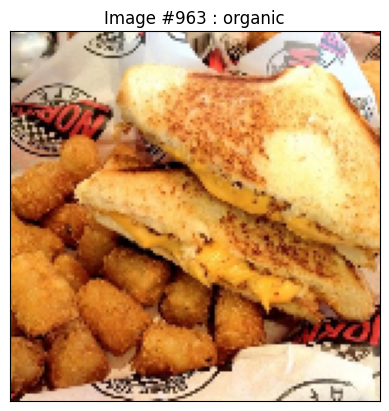

In [135]:
display_random_image(classes, test_images, pred_labels4)

## Model 5

**Changes**
- Image augmentation

In [138]:
initializer = HeNormal()
reg = l2(0.0005)

chanDim = -1

In [139]:
def create_model5():
    model = Sequential()
    model.add(Conv2D(32,(5,5),input_shape = (150,150,3), strides=(2,2),
                     activation = 'relu', kernel_initializer= initializer,
                     kernel_regularizer=reg))
    #model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), activation = 'relu', padding='same',
                     kernel_initializer=initializer, kernel_regularizer=reg))  
    #model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
			kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3), activation = 'relu', padding='same',
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3), activation = 'relu', padding='same', strides=(2,2),
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.25))

    model.add(Conv2D(256,(3,3), activation = 'relu', padding='same',
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3), activation = 'relu', padding='same', strides=(2,2),
                     kernel_initializer=initializer, kernel_regularizer=reg))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.25))

    # fully connected layer
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu', kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(Dense(64, activation = 'relu') )
    #model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(5, activation = 'softmax')) # output
    
    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 128

model5 = create_model5()
print(model5.summary())

checkpoint_path = '../Checkpoints/class-nn5.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor = 'val_accuracy',
    save_freq='epoch',
    save_weights_only=False,
    verbose=1,
    save_best_only = True,
    mode = 'max'
)

es = EarlyStopping(monitor='val_accuracy', patience=10)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 73, 73, 32)        2432      
                                                                 
 conv2d_27 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 73, 73, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_28 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 batch_normalization_9 (Batc  (None, 37, 37, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 37, 37, 64)       

### Image augmentation

In [137]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [ ]:
#H = model.fit(x=aug.flow(trainX, trainY, batch_size=32),
#	validation_data=(testX, testY), steps_per_epoch=len(trainX) // 32,
#	epochs=args["epochs"])

History

In [151]:
hist5 = model5.fit(x = aug.flow(train_images, train_labels, batch_size=32),
                   validation_data=(test_images, test_labels),
                   steps_per_epoch=len(train_images)//32,
                   epochs=10,
                   callbacks=[es,checkpoint])

Epoch 1/10
308/308 [==============================] - ETA: 0s - loss: 1.1984 - accuracy: 0.6436
Epoch 1: val_accuracy improved from -inf to 0.59976, saving model to class-nn5.hdf5
308/308 [==============================] - 220s 712ms/step - loss: 1.1984 - accuracy: 0.6436 - val_loss: 1.2478 - val_accuracy: 0.5998
Epoch 2/10
308/308 [==============================] - ETA: 0s - loss: 1.1862 - accuracy: 0.6438
Epoch 2: val_accuracy did not improve from 0.59976
308/308 [==============================] - 230s 746ms/step - loss: 1.1862 - accuracy: 0.6438 - val_loss: 1.3975 - val_accuracy: 0.5685
Epoch 3/10
308/308 [==============================] - ETA: 0s - loss: 1.1750 - accuracy: 0.6470
Epoch 3: val_accuracy did not improve from 0.59976
308/308 [==============================] - 257s 832ms/step - loss: 1.1750 - accuracy: 0.6470 - val_loss: 1.7650 - val_accuracy: 0.5300
Epoch 4/10
308/308 [==============================] - ETA: 0s - loss: 1.1595 - accuracy: 0.6530
Epoch 4: val_accuracy did

In [ ]:
hist5 = model5.fit(
        train_images,
        train_labels,
        epochs=15,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=2,
        callbacks=[es,checkpoint]
        )

### Plot accuracy and loss

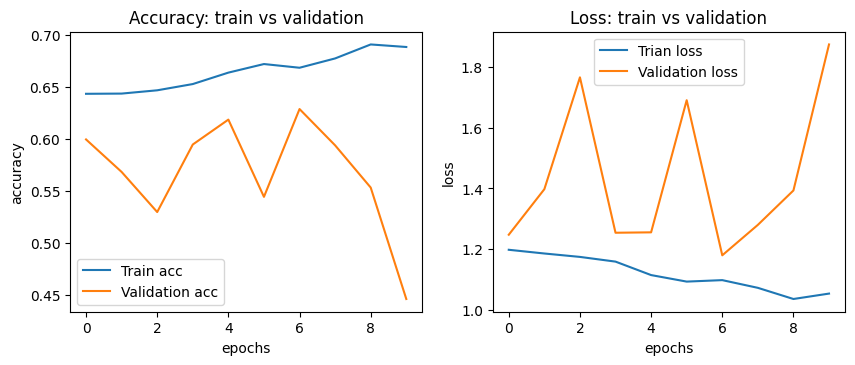

In [152]:
plot_accuracy_loss(hist5)

### Predictions model 5

In [153]:
predictions5 = model5.predict(test_images)     # Vector of probabilities
pred_labels5 = np.argmax(predictions5, axis = 1) # We take the highest probability

78/78 [==============================] - 10s 127ms/step


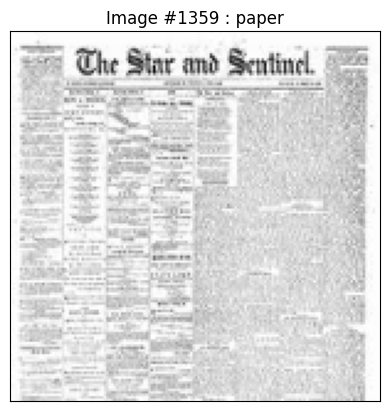

In [155]:
display_random_image(classes, test_images, pred_labels5)

## Model 6: Transfer Learning

- Load data
- Batches of data -> ImageDataGenerator

# Image augmentation

In [ ]:
# Image augmentation
train_datagen = ImageDataGenerator(rescale= 1./255)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")